# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [24]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [25]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...
5,✅ Trip Verified | Could not book online the ...
6,✅ Trip Verified | Having had some rough experi...
7,✅ Trip Verified | This comfortable flight wa...
8,✅ Trip Verified | Punta Cana Terminal B chec...
9,✅ Trip Verified | The employee at Venice Air...


In [26]:
df.tail(10)

,reviews
3928,Just got back from Bridgetown Barbados flying ...
3929,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3930,HKG-LHR in New Club World on Boeing 777-300 - ...
3931,YYZ to LHR - July 2012 - I flew overnight in p...
3932,Flew return in CW from LHR to BKK in August 20...
3933,Flew LHR - VIE return operated by bmi but BA a...
3934,LHR to HAM. Purser addresses all club passenge...
3935,My son who had worked for British Airways urge...
3936,London City-New York JFK via Shannon on A318 b...
3937,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [27]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [28]:
import re

def clean_review(text):
    text = text.lower()
    text = re.sub(r"✅ trip verified \|", "", text)
    text = re.sub(r"not verified \|", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["Cleaned Reviews"] = df["reviews"].apply(clean_review)
df[["reviews", "Cleaned Reviews"]].head(5)


,reviews,Cleaned Reviews
0,✅ Trip Verified | We are extremely grateful ...,we are extremely grateful to the crew of fligh...
1,✅ Trip Verified | I had an appalling experie...,i had an appalling experience with british air...
2,"Not Verified | Good points, the cabin crew, t...",good points the cabin crew they were helpful p...
3,"Not Verified | It was a decent flight, reason...",it was a decent flight reasonable comfortable ...
4,✅ Trip Verified | I really like flying Briti...,i really like flying british airways particula...


In [31]:
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

SENTIMENTAL ANALYSIS

In [34]:
from textblob import TextBlob
df1=pd.read_csv("data/BA_reviews_cleaned.csv")
# To get the sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity   # Range from -1 (negative) to +1 (positive)
    subjectivity = blob.sentiment.subjectivity  # Range from 0 (fact-based) to 1 (opinion-based)
    return polarity, subjectivity

# Apply the function to the cleaned reviews
df1['polarity'], df1['subjectivity'] = zip(*df1['reviews'].apply(get_sentiment))

# Display the results
df1[['Cleaned Reviews', 'polarity', 'subjectivity']].head(10)


,Cleaned Reviews,polarity,subjectivity
0,we are extremely grateful to the crew of fligh...,0.058750,0.560000
1,i had an appalling experience with british air...,-0.056573,0.383696
2,good points the cabin crew they were helpful p...,0.048286,0.491524
3,it was a decent flight reasonable comfortable ...,0.143864,0.650733
4,i really like flying british airways particula...,0.248872,0.512969
5,could not book online the night before because...,-0.151111,0.297778
6,having had some rough experiences with ba in r...,0.073148,0.475000
7,this comfortable flight was ba at its best exc...,0.349184,0.528066
8,punta cana terminal b check in was straightfor...,0.207056,0.540833
9,the employee at venice airport checkin was ver...,-0.258125,0.863125


SENTIMENT POLARITY DISTRIBUTION PLOT

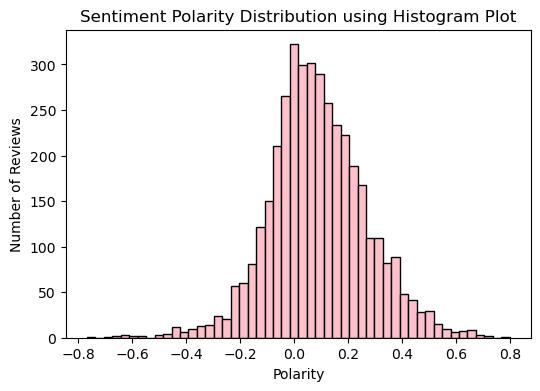

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(df1['polarity'], bins=50, color='pink', edgecolor='black')
plt.title('Sentiment Polarity Distribution using Histogram Plot')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14632\4077408860.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df1, palette='viridis')


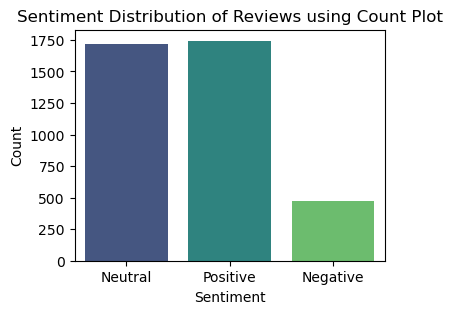

In [37]:
import seaborn as sns
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df1['sentiment'] = df1['polarity'].apply(classify_sentiment)

plt.figure(figsize=(4,3))
sns.countplot(x='sentiment', data=df1, palette='viridis')
plt.title('Sentiment Distribution of Reviews using Count Plot')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


TOPIC MODELLING

In [41]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Clean the reviews text
def preprocess_text(text):
    # Tokenize, remove stopwords and non-alphabetical characters
    text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
    return text

df1['Cleaned Reviews'] = df1['reviews'].apply(preprocess_text)

# Convert reviews to a term-document matrix using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['Cleaned Reviews'])

# Perform LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Display the top words for each topic
n_words = 10
words = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-n_words:]])
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1:
['demanded', 'embraer', 'incheon', 'respects', 'bermuda', 'durban', 'janeiro', 'hamburg', 'seoul', 'rio']

Topic 2:
['seats', 'airways', 'british', 'crew', 'food', 'good', 'seat', 'service', 'ba', 'flight']

Topic 3:
['highly', 'iceland', 'medical', 'excited', 'accommodating', 'commend', 'laughing', 'unwell', 'moments', 'tolerable']

Topic 4:
['learn', 'bunch', 'realized', 'solutions', 'bringing', 'mothers', 'funeral', 'flowers', 'chennai', 'cityflyer']

Topic 5:
['zrh', 'muscat', 'hamburg', 'building', 'upped', 'lhrjfk', 'herded', 'rotterdam', 'abu', 'dhabi']



WORD CLOUD

In [ ]:
pip install wordcloud

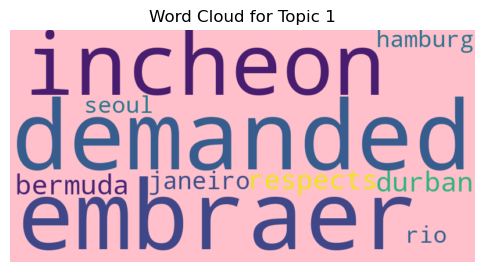

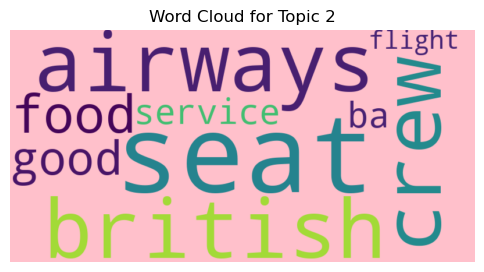

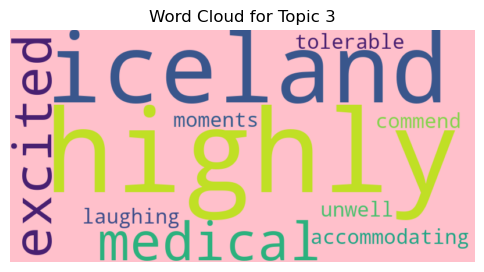

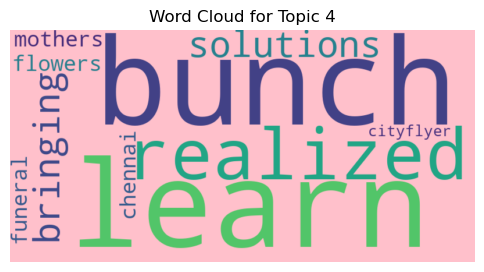

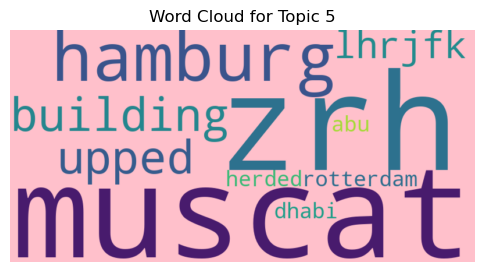

In [42]:
from wordcloud import WordCloud

# Word clouds for each topic
for idx, topic in enumerate(lda.components_):
    topic_words = [words[i] for i in topic.argsort()[-n_words:]]
    wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(' '.join(topic_words))
    
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {idx + 1}")
    plt.show()
